In [1]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.chunk import RegexpParser
from nltk.corpus import wordnet

In [2]:
# Sample text
text = """UNESCO World Heritage Sites: Ajanta Caves, Ellora Caves, Elephanta Caves, Chhatrapati Shivaji Maharaj Terminus (formerly Victoria Terminus),
The Victorian Gothic and Art Deco Ensembles of Mumbai and The Western Ghats, a heritage site made up of 39 individual properties of which 4 are in Maharashtra."""


In [3]:
# Tokenizing and POS tagging
words = word_tokenize(text)
pos_tags = pos_tag(words)

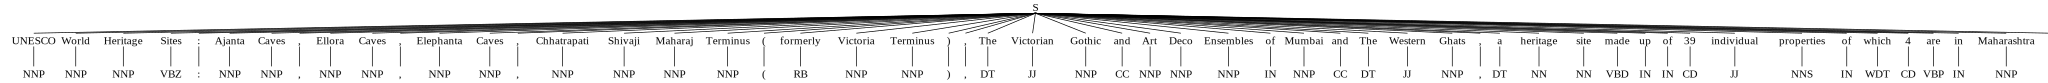

In [12]:
# 1. Chuncking of type <VBD><DT>
chunk_pattern = "Chunk: {<VBD><DT>}"
chunk_parser = RegexpParser(chunk_pattern)
chunks = chunk_parser.parse(pos_tags)
chunks

In [5]:
# 2. Named Entities
entities = nltk.ne_chunk(pos_tags)
for subtree in entities.subtrees():
    if subtree.label() == 'GPE' or subtree.label() == 'PERSON' or subtree.label() == 'ORGANIZATION':
        print(subtree)

(ORGANIZATION UNESCO/NNP)
(PERSON Ajanta/NNP Caves/NNP)
(PERSON Ellora/NNP Caves/NNP)
(PERSON Elephanta/NNP Caves/NNP)
(PERSON Chhatrapati/NNP Shivaji/NNP Maharaj/NNP Terminus/NNP)
(PERSON Victoria/NNP Terminus/NNP)
(ORGANIZATION Victorian/JJ Gothic/NNP)
(PERSON Art/NNP Deco/NNP Ensembles/NNP)
(GPE Mumbai/NNP)
(GPE Maharashtra/NNP)


In [6]:
# 3. Verbs with Porter and Lancaster Stemmers
verbs = [word for word, pos in pos_tags if pos.startswith('V')]
porter = PorterStemmer()
lancaster = LancasterStemmer()
stemmed_verbs_porter = [porter.stem(verb) for verb in verbs]
stemmed_verbs_lancaster = [lancaster.stem(verb) for verb in verbs]

print("Verbs with Porter Stemmer:", stemmed_verbs_porter)
print("Verbs with Lancaster Stemmer:", stemmed_verbs_lancaster)

Verbs with Porter Stemmer: ['site', 'made', 'are']
Verbs with Lancaster Stemmer: ['sit', 'mad', 'ar']


In [7]:
# 4. Verbs in Past Tense (Lemmatized, Unique)
past_tense_verbs = [word for word, pos in pos_tags if pos == 'VBD']
lemmatizer = WordNetLemmatizer()
lemmatized_verbs = list(set([lemmatizer.lemmatize(verb, 'v') for verb in past_tense_verbs]))

print("Unique Lemmatized Past Tense Verbs:", lemmatized_verbs)


Unique Lemmatized Past Tense Verbs: ['make']


In [8]:
# 5. Adjectives and Their Synonyms
adjectives = [word for word, pos in pos_tags if pos == 'JJ']
synonyms = [wordnet.synsets(adj)[0].lemmas()[0].name() for adj in adjectives] if adjectives else []


print(" Adjectives and Their Synonyms:", synonyms)


 Adjectives and Their Synonyms: ['Victorian', 'Western', 'person']


In [9]:
# 6. Verbs and Their Antonyms
antonyms = []
for verb in verbs:
    for syn in wordnet.synsets(verb, pos=wordnet.VERB):
        for lemma in syn.lemmas():
            if lemma.antonyms():
                antonyms.append(lemma.antonyms()[0].name())

print("Verbs and Their Antonyms:", antonyms)

Verbs and Their Antonyms: ['stand', 'arise', 'unmake', 'break', 'differ']


In [10]:
# 7. Print all entities marked as DATE and TIME
for subtree in entities.subtrees():
    if subtree.label() == 'DATE' or subtree.label() == 'TIME':
        print(subtree.leaves())

In [11]:
locations = [word for word, pos in pos_tags if pos == 'NNP']

print("Named Locations:", locations)


Named Locations: ['UNESCO', 'World', 'Heritage', 'Ajanta', 'Caves', 'Ellora', 'Caves', 'Elephanta', 'Caves', 'Chhatrapati', 'Shivaji', 'Maharaj', 'Terminus', 'Victoria', 'Terminus', 'Gothic', 'Art', 'Deco', 'Ensembles', 'Mumbai', 'Ghats', 'Maharashtra']
